Michael Eng

# Homework 5: IMDB

# Part 1

## Import Data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb 
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/mike/.local/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/mike/.local/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you

In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [3]:
import numpy as np

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [4]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [5]:
print(train_data[0])
print(train_labels[0:20])
# I assume the original data is the index of a word in a dictionary. vectorize then turns this into a vector representing how often a word appears in the list
print(x_train[0])
print(y_train[0:20])
print(x_train.shape)
print(y_train.shape)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]
[0. 1. 1. ... 0. 0

## Build Neural Networks

In [6]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

# model is the control. it uses 2 hidden layers, 16 nodes per layer, relu and binary crossentropy
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = []

history.append(model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0).history)


In [7]:
# model2 uses 2 hidden layers, 32 nodes per layer, relu and binary_crossentropy
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history.append(model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0).history)


In [8]:
# model3 uses 3 hidden layers, 16 nodes per layer, relu and binary_crossentropy 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history.append(model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0).history)

In [9]:
# model4 uses 3 hidden layers, 32 nodes per layer, relu and binary_crossentropy
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history.append(model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0).history)

In [10]:
# model5 uses 2 hidden layers, 16 nodes per layer, relu and mse
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.MSE,
              metrics=[metrics.binary_accuracy])

history.append(model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0).history)

In [11]:
# model6 uses 2 hidden layers, 16 nodes per layer, tanh and binary crossentropy
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='tanh'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history.append(model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0).history)

In [12]:
history[0].keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

## Show results

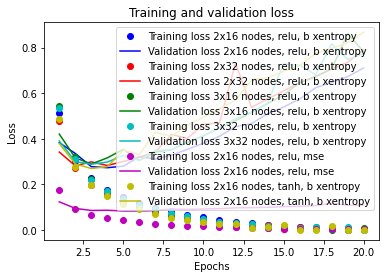

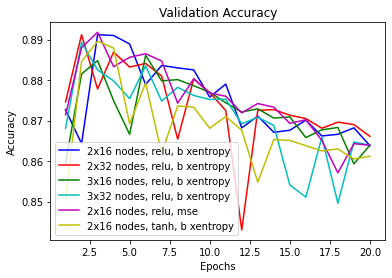

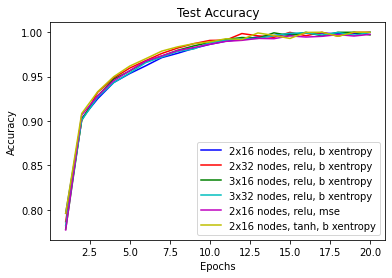

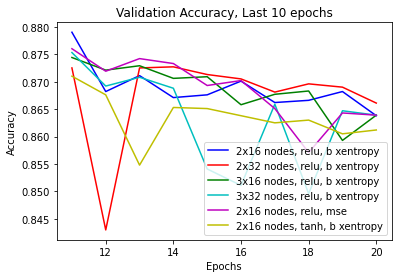

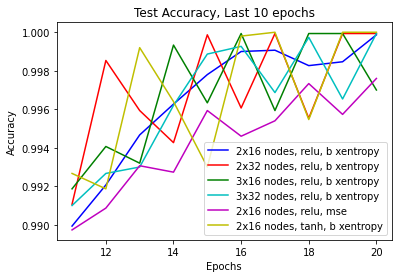

[0.09860753805842251, 0.08403449433972128, 0.09490711772232316, 0.09545910236192867, 0.03110512880375609, 0.08207399144157534]
[0.44282247722148893, 0.49654417634010317, 0.48753096014261244, 0.49468314796686175, 0.09778383597731591, 0.540027278661728]
[0.8749899983406066, 0.8738350003957749, 0.8727400004863739, 0.8708200007677078, 0.8754000008106232, 0.8686299949884415]
[0.9682199984788895, 0.9701466768980026, 0.9685833394527436, 0.9678700000047684, 0.9673500061035156, 0.9713166683912278]


In [14]:
import matplotlib.pyplot as plt
loss_values = [history[i]['loss'] for i in range(len(history))]
val_loss_values = [history[i]['val_loss'] for i in range(len(history))]
acc_values_val = [history[i]['val_binary_accuracy'] for i in range(len(history))]
acc_values = [history[i]['binary_accuracy'] for i in range(len(history))]
loss_values_total = [np.mean(history[i]['loss']) for i in range(len(history))]
val_loss_values_total = [np.mean(history[i]['val_loss']) for i in range(len(history))]
acc_values_val_total = [np.mean(history[i]['val_binary_accuracy']) for i in range(len(history))]
acc_values_total = [np.mean(history[i]['binary_accuracy']) for i in range(len(history))]

epochs = range(1, len(acc_values[0]) + 1)

plt.plot(epochs, loss_values[0], 'bo', label='Training loss 2x16 nodes, relu, b xentropy')
plt.plot(epochs, val_loss_values[0], 'b', label='Validation loss 2x16 nodes, relu, b xentropy')
plt.plot(epochs, loss_values[1], 'ro', label='Training loss 2x32 nodes, relu, b xentropy')
plt.plot(epochs, val_loss_values[1], 'r', label='Validation loss 2x32 nodes, relu, b xentropy')
plt.plot(epochs, loss_values[2], 'go', label='Training loss 3x16 nodes, relu, b xentropy')
plt.plot(epochs, val_loss_values[2], 'g', label='Validation loss 3x16 nodes, relu, b xentropy')
plt.plot(epochs, loss_values[3], 'co', label='Training loss 3x32 nodes, relu, b xentropy')
plt.plot(epochs, val_loss_values[3], 'c', label='Validation loss 3x32 nodes, relu, b xentropy')
plt.plot(epochs, loss_values[4], 'mo', label='Training loss 2x16 nodes, relu, mse')
plt.plot(epochs, val_loss_values[4], 'm', label='Validation loss 2x16 nodes, relu, mse')
plt.plot(epochs, loss_values[5], 'yo', label='Training loss 2x16 nodes, tanh, b xentropy')
plt.plot(epochs, val_loss_values[5], 'y', label='Validation loss 2x16 nodes, tanh, b xentropy')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc_values_val[0], 'b', label='2x16 nodes, relu, b xentropy')
plt.plot(epochs, acc_values_val[1], 'r', label='2x32 nodes, relu, b xentropy')
plt.plot(epochs, acc_values_val[2], 'g', label='3x16 nodes, relu, b xentropy')
plt.plot(epochs, acc_values_val[3], 'c', label='3x32 nodes, relu, b xentropy')
plt.plot(epochs, acc_values_val[4], 'm', label='2x16 nodes, relu, mse')
plt.plot(epochs, acc_values_val[5], 'y', label='2x16 nodes, tanh, b xentropy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, acc_values[0], 'b', label='2x16 nodes, relu, b xentropy')
plt.plot(epochs, acc_values[1], 'r', label='2x32 nodes, relu, b xentropy')
plt.plot(epochs, acc_values[2], 'g', label='3x16 nodes, relu, b xentropy')
plt.plot(epochs, acc_values[3], 'c', label='3x32 nodes, relu, b xentropy')
plt.plot(epochs, acc_values[4], 'm', label='2x16 nodes, relu, mse')
plt.plot(epochs, acc_values[5], 'y', label='2x16 nodes, tanh, b xentropy')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs[10:], acc_values_val[0][10:], 'b', label='2x16 nodes, relu, b xentropy')
plt.plot(epochs[10:], acc_values_val[1][10:], 'r', label='2x32 nodes, relu, b xentropy')
plt.plot(epochs[10:], acc_values_val[2][10:], 'g', label='3x16 nodes, relu, b xentropy')
plt.plot(epochs[10:], acc_values_val[3][10:], 'c', label='3x32 nodes, relu, b xentropy')
plt.plot(epochs[10:], acc_values_val[4][10:], 'm', label='2x16 nodes, relu, mse')
plt.plot(epochs[10:], acc_values_val[5][10:], 'y', label='2x16 nodes, tanh, b xentropy')
plt.title('Validation Accuracy, Last 10 epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs[10:], acc_values[0][10:], 'b', label='2x16 nodes, relu, b xentropy')
plt.plot(epochs[10:], acc_values[1][10:], 'r', label='2x32 nodes, relu, b xentropy')
plt.plot(epochs[10:], acc_values[2][10:], 'g', label='3x16 nodes, relu, b xentropy')
plt.plot(epochs[10:], acc_values[3][10:], 'c', label='3x32 nodes, relu, b xentropy')
plt.plot(epochs[10:], acc_values[4][10:], 'm', label='2x16 nodes, relu, mse')
plt.plot(epochs[10:], acc_values[5][10:], 'y', label='2x16 nodes, tanh, b xentropy')
plt.title('Test Accuracy, Last 10 epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(loss_values_total)
print(val_loss_values_total)
print(acc_values_val_total)
print(acc_values_total)

To get a better idea of the difference of parameters, I took out the first 10 epochs in the last two graphs to exaggerate the difference.

According to the graphs and totals, increasing the amount of layers increases the loss and very slightly decreases the accuracy. 

Doubling the amount of neurons per layer decreases training loss, but increases validation loss. It also slightly decreases validation accuracy, but increases test accuracy.

Changing the loss function to mse substaintally decreases overall training and validation loss, while slightly decreasing both train and test accuracy.

Changing the activation function to tanh slightly decreases training loss but increases validation loss. It slightly reduces validation accuracy but increases testing accuracy.

# Part 2

Get data from fashion_mnist dataset from homework 4

In [15]:
from keras.datasets import fashion_mnist2
from tensorflow.keras import utils

(X_train, y_train), (X_test, y_test) = fashion_mnist2.load_data()

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

validation_size = 15000
x_val = X_train[:validation_size]
partial_x_train = X_train[validation_size:]
y_val = y_train[:validation_size]
partial_y_train = y_train[validation_size:]

Using TensorFlow backend.


In [16]:
print(x_val.shape)
print(y_val.shape)

(15000, 784)
(15000, 10)


Train network with no dropout

In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

network = models.Sequential()
network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

network.fit(partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=512,
        validation_data=(x_val, y_val),
        verbose=0)


In [18]:
training_history = []
testing_history = []
reg_facts = []
do_rates = []


for reg_fact in [1/10**i for i in range(0, 7, 2)]:
    for do_rate in [0.1 * i for i in range(3, 8, 2)]:
        reg_facts.append(reg_fact)
        do_rates.append(do_rate)
        network = models.Sequential()
        network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(reg_fact), activation='relu', input_shape=(28 * 28,)))
        network.add(layers.Dropout(do_rate))
        network.add(layers.Dense(10, activation='softmax'))
        
        network.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
        
        training_history.append(network.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0).history)
        testing_history.append(network.evaluate(X_test, y_test, verbose=0))
        

In [19]:
loss_values = [training_history[i]['loss'] for i in range(len(training_history))]
val_loss_values = [training_history[i]['val_loss'] for i in range(len(training_history))]
acc_values_val = [training_history[i]['val_binary_accuracy'] for i in range(len(training_history))]
acc_values = [training_history[i]['binary_accuracy'] for i in range(len(training_history))]
loss_values_total = [np.mean(training_history[i]['loss']) for i in range(len(training_history))]
val_loss_values_total = [np.mean(training_history[i]['val_loss']) for i in range(len(training_history))]
acc_values_val_total = [np.mean(training_history[i]['val_binary_accuracy']) for i in range(len(training_history))]
acc_values_total = [np.mean(training_history[i]['binary_accuracy']) for i in range(len(training_history))]

In [20]:
print(network.metrics_names)
print(testing_history[0])

['loss', 'binary_accuracy']
[0.410563588142395, 0.8999972939491272]


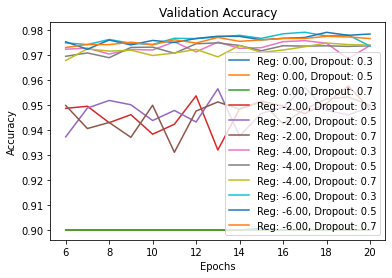

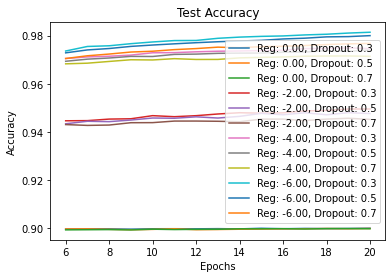

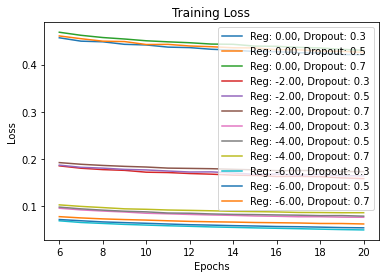

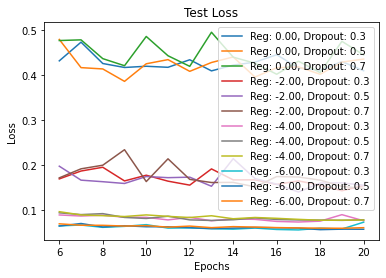

The regularization factor of 0.000001 and dropout rate of 0.300000 yielded the best validation accuracy of 0.974414.
The regularization factor of 0.000001 and dropout rate of 0.300000 yielded the best test accuracy of 0.974752.
The regularization factor of 0.000001 and dropout rate of 0.300000 yielded the lowest testing loss of 0.067605.
The regularization factor of 0.000001 and dropout rate of 0.300000 yielded the lowest training loss of 0.067379.


In [21]:
for i, hist in enumerate(training_history):
    plt.plot(epochs[5:], hist['val_binary_accuracy'][5:], label='Reg: %1.2f, Dropout: %1.1f' %(np.log10(reg_facts[i]), do_rates[i]))
    
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

for i, hist in enumerate(training_history):
    plt.plot(epochs[5:], hist['binary_accuracy'][5:], label='Reg: %1.2f, Dropout: %1.1f' %(np.log10(reg_facts[i]), do_rates[i]))
    
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

for i, hist in enumerate(training_history):
    plt.plot(epochs[5:], hist['loss'][5:], label='Reg: %1.2f, Dropout: %1.1f' %(np.log10(reg_facts[i]), do_rates[i]))
    
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

for i, hist in enumerate(training_history):
    plt.plot(epochs[5:], hist['val_loss'][5:], label='Reg: %1.2f, Dropout: %1.1f' %(np.log10(reg_facts[i]), do_rates[i]))
    
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

index_of_best_val_acc = np.argmax(acc_values_val_total)
index_of_best_test_acc = np.argmax(acc_values_total)
index_of_best_val_loss = np.argmin(loss_values_total)
index_of_best_test_loss = np.argmin(val_loss_values_total)


print('The regularization factor of %f and dropout rate of %f yielded the best validation accuracy of %f.' %(reg_facts[index_of_best_val_acc], do_rates[index_of_best_val_acc], acc_values_val_total[index_of_best_val_acc]))
print('The regularization factor of %f and dropout rate of %f yielded the best test accuracy of %f.' %(reg_facts[index_of_best_test_acc], do_rates[index_of_best_test_acc], acc_values_total[index_of_best_test_acc]))
print('The regularization factor of %f and dropout rate of %f yielded the lowest testing loss of %f.' %(reg_facts[index_of_best_test_loss], do_rates[index_of_best_test_loss], loss_values_total[index_of_best_test_loss]))
print('The regularization factor of %f and dropout rate of %f yielded the lowest training loss of %f.' %(reg_facts[index_of_best_val_loss], do_rates[index_of_best_val_loss], val_loss_values_total[index_of_best_val_loss]))

The parameters with the best results is a regularization factor of 10^-6 and a dropout rate of 0.3. These parameters do not make the model overfit as the testing and training loss and validation and test accuracy are very similar.

In the two cells below I tried to wrap the neural network in an sklearn style estimator so I could use gridsearchcv to find the best parameters. It didnt't work so I gave up on it, but I thought I should include it anyway. Maybe I'll come back to it in the future.

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score


class MyCustomNN(BaseEstimator):
    def __init__(self, reg_fact=0.001, do_rate=0.5):
        self.reg_fact = reg_fact,
        self.do_rate = do_rate
        
    def get_params(self, deep=True):
        params = {
                'reg_fact': self.reg_fact,
                'do_rate': self.do_rate
            }
        return params

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def fit(self, x, y):
        self.network = models.Sequential()
        self.network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(self.reg_fact), activation='relu', input_shape=(28 * 28,)))
        self.network.add(layers.Dropout(self.do_rate))
        self.network.add(layers.Dense(10, activation='softmax'))
        self.network.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
        return self.network.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)
    
    def predict(self, x, y):
        return self.network.predict(x)
    
    def score(self, x, y):
        return accuracy_score(y, predict(x))

In [ ]:
from sklearn.model_selection import GridSearchCV

params_to_be_compared = [{
        'reg_fact' : [1/10**i for i in range(0, 6)],
        'do_rate' : [0.1 * i for i in range(3, 7, 2)]
    }]

lrgs = GridSearchCV(MyCustomNN(), param_grid=params_to_be_compared, cv=3)
lrgs_results = lrgs.fit(X=X_train, y=y_train)
print('The best accuracy calculated was %0.5f and the parameters were: ' %(lrgs_results.best_score_))
print(lrgs_results.best_params_)